In [90]:
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [91]:
data = os.path.abspath(os.path.join('.','data', 'data.csv'))

In [92]:
df = pd.read_csv(data)

In [ ]:
df.columns

Index(['Channel', 'AuthorID', 'Author', 'Date', 'Content', 'Attachments',
       'Reactions'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
message_count = df.groupby(df['Date'].dt.date).size()

# Create a new DataFrame with the date and corresponding message count
message_count_df = pd.DataFrame({'Date': message_count.index, 'Message_Count': message_count.values})


In [52]:
message_count_df['Date'] = pd.to_datetime(message_count_df['Date'])

In [53]:
data = pd.merge(df, message_count_df, on='Date', how='left')

In [54]:
data['Message_Count'].value_counts()

Message_Count
49.0     4
125.0    4
34.0     3
33.0     3
67.0     3
166.0    3
51.0     3
73.0     3
37.0     3
105.0    2
42.0     2
46.0     2
101.0    2
64.0     2
85.0     2
95.0     2
75.0     2
65.0     2
72.0     2
122.0    2
81.0     1
31.0     1
194.0    1
60.0     1
57.0     1
76.0     1
36.0     1
15.0     1
55.0     1
86.0     1
47.0     1
339.0    1
66.0     1
267.0    1
333.0    1
26.0     1
82.0     1
127.0    1
79.0     1
89.0     1
98.0     1
50.0     1
135.0    1
58.0     1
32.0     1
54.0     1
56.0     1
18.0     1
106.0    1
77.0     1
2.0      1
28.0     1
10.0     1
30.0     1
25.0     1
Name: count, dtype: int64

In [55]:
activity_data = data.groupby(data['Date'].dt.date)['Content'].count().reset_index(name='Message_Count')


In [56]:
# Split the data into features (X) and target variable (y)
X = activity_data[['Date']]
y = activity_data['Message_Count']

In [57]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Fit ARIMA model
model = ARIMA(y_train, order=(5,1,0))
model_fit = model.fit()

c:\Users\ProBook\Desktop\Work\Desights\Discord Community\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProBook\Desktop\Work\Desights\Discord Community\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProBook\Desktop\Work\Desights\Discord Community\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
# Forecast
forecast = model_fit.forecast(steps=len(X_test))


c:\Users\ProBook\Desktop\Work\Desights\Discord Community\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ProBook\Desktop\Work\Desights\Discord Community\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84754 entries, 0 to 84753
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Channel        84754 non-null  object        
 1   AuthorID       84754 non-null  int64         
 2   Author         84754 non-null  object        
 3   Date           84754 non-null  datetime64[ns]
 4   Content        64609 non-null  object        
 5   Attachments    1959 non-null   object        
 6   Reactions      6073 non-null   object        
 7   Message_Count  84315 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 5.2+ MB


In [64]:
data=data[['Date','Message_Count']]

In [65]:
data.dropna(inplace=True)

C:\Users\ProBook\AppData\Local\Temp\ipykernel_6184\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [60]:
data['Message_Count'].interpolate(method='linear', inplace=True)

C:\Users\ProBook\AppData\Local\Temp\ipykernel_6184\3720460105.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Message_Count'].interpolate(method='linear', inplace=True)


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84315 entries, 439 to 84753
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           84315 non-null  datetime64[ns]
 1   Message_Count  84315 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


In [71]:
# Convert 'Date' column to datetime if it's not already in datetime format
#data['Date'] = pd.to_datetime(data['Date'])

data['Date'] = pd.to_datetime(data['Date'])

# Aggregate data by year and sum the message counts for each year
yearly_data = data.groupby(data['Date'].dt.year)['Message_Count'].sum().reset_index()

# Sort the DataFrame by year
yearly_data.sort_values(by='Date', inplace=True)

# Calculate Simple Moving Average (SMA) for yearly data
def calculate_yearly_sma(data, window_size=3):
    sma = data['Message_Count'].rolling(window=window_size).mean()
    return sma

# Fit ARIMA model for yearly data
def fit_yearly_arima(data):
    model = ARIMA(data['Message_Count'], order=(5,1,0))
    model_fit = model.fit()
    return model_fit

# Hybrid Model combining SMA and ARIMA for yearly data
def hybrid_yearly_model(data, window_size=3):
    sma = calculate_yearly_sma(data, window_size)
    data['SMA'] = sma
    data.dropna(inplace=True)
    
    model = fit_yearly_arima(data)
    return model


C:\Users\ProBook\AppData\Local\Temp\ipykernel_6184\1400304518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


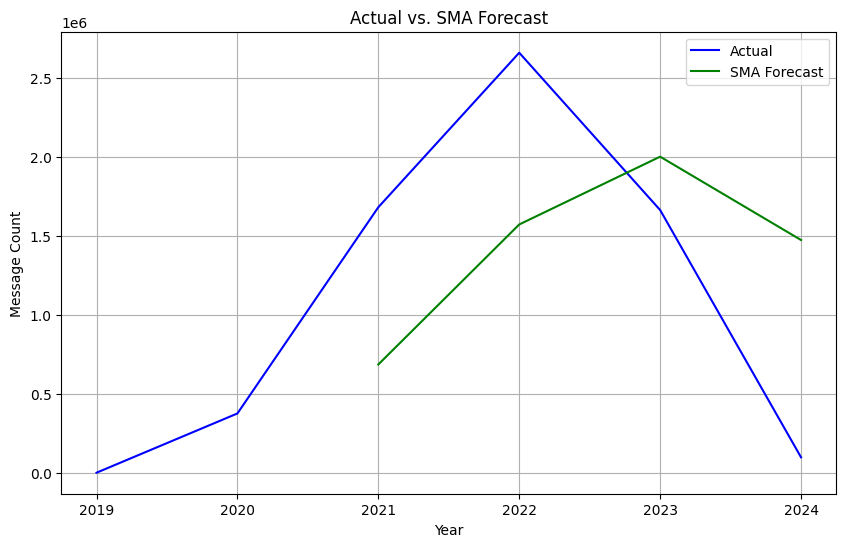

In [73]:
# Plotting actual vs. forecast for SMA
plt.figure(figsize=(10, 6))
window_size = 3
plt.plot(yearly_data['Date'], yearly_data['Message_Count'], label='Actual', color='blue')
plt.plot(yearly_data['Date'], calculate_yearly_sma(yearly_data, window_size), label='SMA Forecast', color='green')
plt.xlabel('Year')
plt.ylabel('Message Count')
plt.title('Actual vs. SMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\ProBook\Desktop\Work\Desights\Discord Community\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


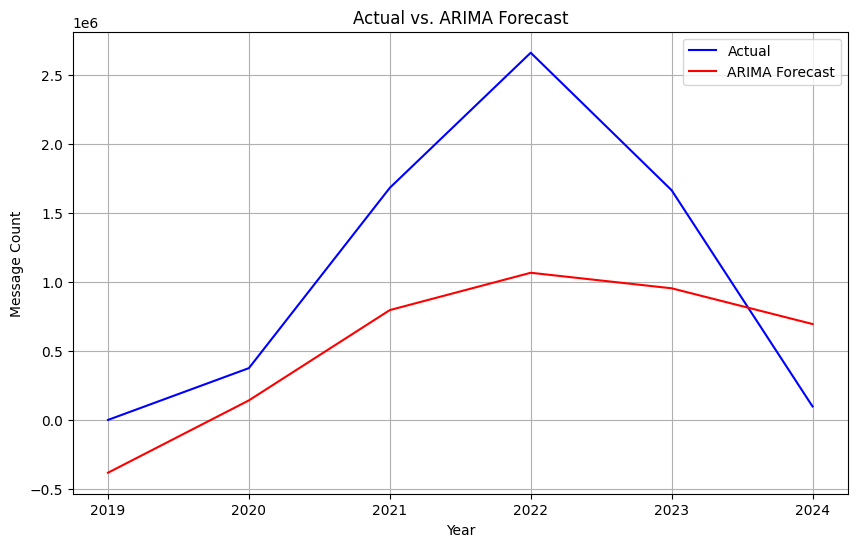

In [75]:
# Plotting actual vs. forecast for ARIMA
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Date'], yearly_data['Message_Count'], label='Actual', color='blue')
plt.plot(yearly_data['Date'], fit_yearly_arima(yearly_data).forecast(steps=len(yearly_data)), label='ARIMA Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Message Count')
plt.title('Actual vs. ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\ProBook\Desktop\Work\Desights\Discord Community\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


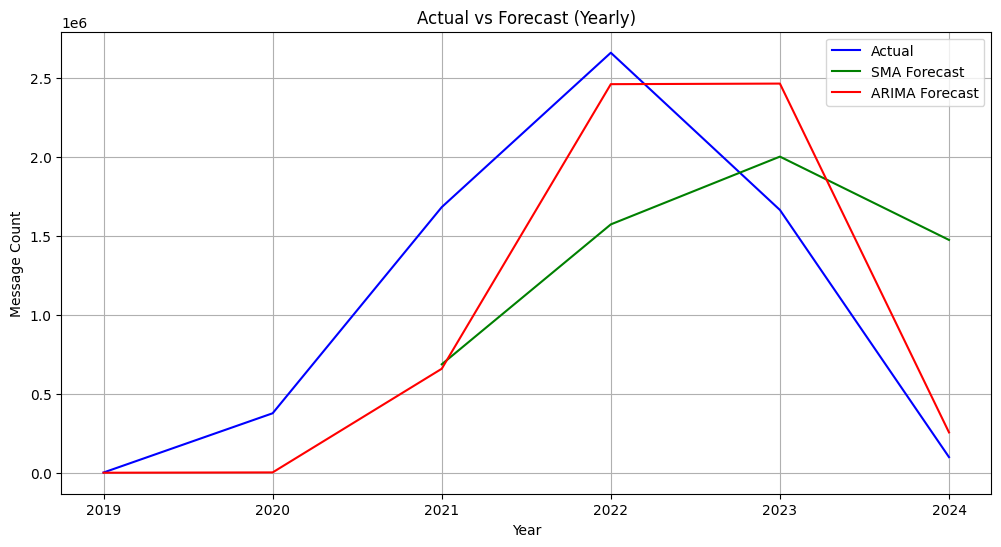

In [80]:


# Convert 'Date' column to datetime if it's not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate data by year and sum the message counts for each year
yearly_data = data.groupby(data['Date'].dt.year)['Message_Count'].sum().reset_index()

# Sort the DataFrame by year
yearly_data.sort_values(by='Date', inplace=True)

# Define a function to calculate the Simple Moving Average (SMA) for yearly data
def calculate_yearly_sma(data, window_size):
    return data['Message_Count'].rolling(window=window_size).mean()

# Define a function to fit an ARIMA model for yearly data
def fit_yearly_arima(data, order):
    model = ARIMA(data['Message_Count'], order=order)
    model_fit = model.fit()
    return model_fit

# Define parameters
window_size_sma = 3
order_arima = (5, 1, 0)  # Example ARIMA order

# Calculate SMA for yearly data
sma_forecast_yearly = calculate_yearly_sma(yearly_data, window_size_sma)

# Fit ARIMA model for yearly data
arima_model_fit_yearly = fit_yearly_arima(yearly_data, order_arima)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Date'], yearly_data['Message_Count'], label='Actual', color='blue')
plt.plot(yearly_data['Date'], sma_forecast_yearly, label='SMA Forecast', color='green')
plt.plot(yearly_data['Date'], arima_model_fit_yearly.fittedvalues, label='ARIMA Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Message Count')
plt.title('Actual vs Forecast (Yearly)')
plt.legend()
plt.grid(True)
plt.show()


For the SMA model, the window_size_sma parameter defines the size of the moving window used for averaging. By selecting an appropriate window size, you can balance smoothing and responsiveness to changes in the data.
For the ARIMA model, the order_arima parameter represents the (p, d, q) parameters used for the ARIMA model. These parameters are crucial for capturing the autocorrelation and seasonality in the data. By selecting the optimal values for p, d, and q, you can improve the model's forecasting accuracy.